Available columns: Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


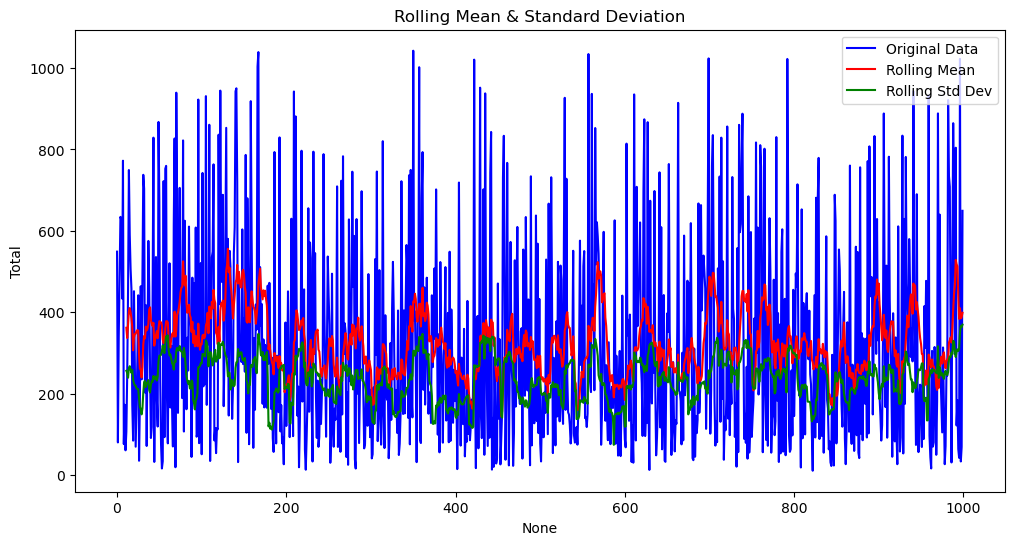


💡 Augmented Dickey-Fuller Test Results:
Test Statistic: -30.603524139206876
p-value: 0.0
Lags Used: 0
Number of Observations Used: 999
Critical Value (1%): -3.4369127451400474
Critical Value (5%): -2.864437475834273
Critical Value (10%): -2.568312754566378

✅ The time series is **stationary** (p-value ≤ 0.05).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# 🔹 Load the dataset
file_path = r"C:\Users\leela\Downloads\archive (5)\supermarket_sales - Sheet1.csv"  # Update the correct path
df = pd.read_csv(file_path)

# 🔹 Print available columns
print("Available columns:", df.columns)

# 🔹 Strip spaces from column names
df.columns = df.columns.str.strip()

# 🔹 Choose the correct column for analysis
time_series_column = "Total"  # Change to "gross income" or "cogs" if needed

# 🔹 Check if the column exists
if time_series_column not in df.columns:
    raise ValueError(f"Column '{time_series_column}' not found! Available columns: {df.columns}")

# 🔹 Extract time series data
time_series = df[time_series_column].dropna()

# 🔹 Compute Rolling Mean & Standard Deviation
rolling_window = 12
rolling_mean = time_series.rolling(window=rolling_window).mean()
rolling_std = time_series.rolling(window=rolling_window).std()

# 🔹 Plot Rolling Mean & Standard Deviation
plt.figure(figsize=(12, 6))
sns.lineplot(x=time_series.index, y=time_series, label="Original Data", color="blue")
sns.lineplot(x=rolling_mean.index, y=rolling_mean, label="Rolling Mean", color="red")
sns.lineplot(x=rolling_std.index, y=rolling_std, label="Rolling Std Dev", color="green")
plt.title("Rolling Mean & Standard Deviation")
plt.legend()
plt.show()

# 🔹 Perform Augmented Dickey-Fuller (ADF) test
print("\n💡 Augmented Dickey-Fuller Test Results:")
adf_test = adfuller(time_series, autolag="AIC")

# Extract and display results
adf_results = {
    "Test Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Lags Used": adf_test[2],
    "Number of Observations Used": adf_test[3],
}

for key, value in adf_test[4].items():
    adf_results[f"Critical Value ({key})"] = value

for key, value in adf_results.items():
    print(f"{key}: {value}")

# 🔹 Conclusion on stationarity
if adf_test[1] <= 0.05:
    print("\n✅ The time series is **stationary** (p-value ≤ 0.05).")
else:
    print("\n❌ The time series is **not stationary** (p-value > 0.05). Consider differencing or transformation.")
